In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= 10000)

In [8]:
x_train.shape, x_test.shape, y_train.shape

((25000,), (25000,), (25000,))

In [11]:
x_train;

In [18]:
max([len(x) for x in x_train])

2494

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# pad the sequence to have the equal length
# can specify but may lose info or take max len but will increase compute

# max_len = max([len(x) for x in x_train])
max_len = 500
x_train = pad_sequences(x_train, maxlen= max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, Embedding, GRU

In [32]:
# set the input and output dimension
input_dim = 10000   # vocabulary size
output_dim = 1

In [39]:
# Build the model

model = Sequential()

In [40]:
# embedding layer
model.add(Embedding(input_dim, 128, input_length = max_len))

# bi directional
model.add(Bidirectional(GRU(150,return_sequences=True)))

model.add(Bidirectional(GRU(150)))

model.add(Dense(output_dim, activation= 'sigmoid'))

In [41]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# early stopping if necessary

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10,
                               restore_best_weights = True)

In [45]:
# train the model

history = model.fit(x_train, y_train, callbacks= [early_stopping],
                    epochs = 15, batch_size = 32,
                    validation_split = 0.2, verbose = 1)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 536s 858ms/step - accuracy: 0.7449 - loss: 0.5066 - val_accuracy: 0.7764 - val_loss: 0.4795
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 515s 823ms/step - accuracy: 0.8938 - loss: 0.2618 - val_accuracy: 0.8814 - val_loss: 0.2771
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 501s 801ms/step - accuracy: 0.9518 - loss: 0.1345 - val_accuracy: 0.8660 - val_loss: 0.3284
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 493s 788ms/step - accuracy: 0.9712 - loss: 0.0809 - val_accuracy: 0.8830 - val_loss: 0.3542
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 510s 816ms/step - accuracy: 0.9872 - loss: 0.0415 - val_accuracy: 0.8814 - val_loss: 0.4539
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 511s 818ms/step - accuracy: 0.9928 - loss: 0.0228 - val_accuracy: 0.8838 - val_loss: 0.5273
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 512s 819ms/step - accuracy: 0.9924 - loss: 0.0220 - val_accuracy: 0.8684 - val_loss: 0.5036
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 513s 821ms/step - accuracy: 0.9955 -

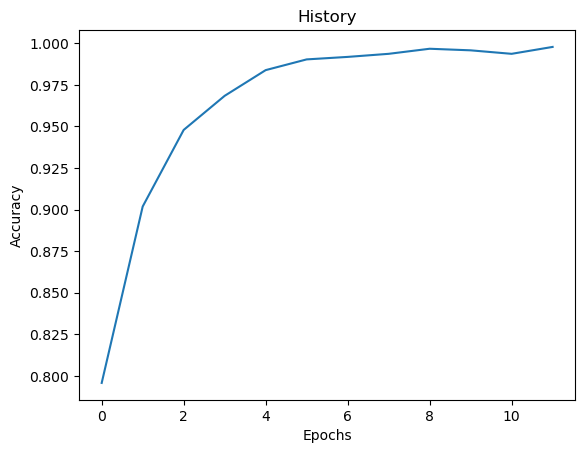

In [46]:
# Plot the accuracy 
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")


In [52]:
# predict
predictions = model.predict(x_test[:4])
for pred in predictions:
    print(np.argmax(pred[0]), end = ' ')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
0 0 0 0 

In [53]:
# save the model

model.save('BiDirection_GRU_rnn_imdb.h5')